# <center><font color='OrangeRed'>План деятельности интернет-магазина "Стримчик" на 2017 год</font></center>

Данное исследование будет направлено на анализ рынка игровой индустрии до 2016 года, чтобы спрогнозировать, что может быть в 2017 года. 

Главная **цели** исследования:
    1. определить закономерности на рынке компьютерных игр, влияющих на успешность игры.
    2. составить портрет пользователя для каждого региона
    3. предложить и проверить гипотезы 
    4. определить потенциально популярный игровой продукт

Анализ будет проводиться мной в несколько этапов:
    1. Обзор и предобработка данных
    2. Исследовательский анализ данных
    3. Составление портрета пользователя для каждого региона
    4. Предложение и проверка гипотез
    5. Вывод
    
Главным итогом данного анализа должны быть рекомендации, которые позволят интернет-магазину "Стримчик" выявить **продукты**, которые могут оказаться наиболее перспективными в 2017 году, а также увеличат прибыль и потребительскую активность.

# <font style="background-color: Cyan; color=black">Обзор и предобработка данных</font> #

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from pymystem3 import Mystem
import seaborn as sns
import math as mt
from scipy import stats as st

<font color='blue'>Общая информация о представленных данных</font>

In [2]:
sales = pd.read_csv('/datasets/games.csv')
sales.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Общая информация о представленных данных следующая:
- всего **16715** строк
- присутсвуют столбцы с *объектами* и *числами типа float*
- в некоторых столбцах присутствуют *пропуски* (это столбцы с рейтингом (критики, пользователи, рейтинг от ассоциации ESRB)). Связано это может быть с тем, что игра была выпущена достаточно давно (видно по срезу), либо исходны данные неполные

In [4]:
print('Уникальных наименований игр {:.0f}'.format(len(sales['Name'].unique())))

Уникальных наименований игр 11560


In [5]:
print('Количество платформ - {:.0f}'.format(len(sales['Platform'].unique())))

Количество платформ - 31


In [6]:
sales['Year_of_Release'].sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

Годы выпуска игр: с 1980 по 2016, некоторые данные неизвестны.

In [7]:
sales['Genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', nan], dtype=object)

In [8]:
len(sales['Genre'].unique())

13

Игры разделены на **12** (13, так как есть пропуски) жанров

In [9]:
sales[['NA_sales', 'EU_sales', 'JP_sales', 'Other_sales']].describe().round(2)

,NA_sales,EU_sales,JP_sales,Other_sales
count,16715.00,16715.00,16715.00,16715.00
mean,0.26,0.15,0.08,0.05
std,0.81,0.50,0.31,0.19
min,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00
50%,0.08,0.02,0.00,0.01
75%,0.24,0.11,0.04,0.03
max,41.36,28.96,10.22,10.57


Данные по продажам поделены на несколько основных категорий по странам: 
    - Северная Америка
    - Европа
    - Япония
    - Остальной мир
    
Количество проданных копий игры распределился следующим образом (в млн):
    - Северная Америка - от 0 до 41,36 
    - Европа - от 0 до 28,96
    - Япония - от 0 до 10,22
    - Остальной мир - от 0 до 10,57
    
Как мы видим, наибольшие продажи случались в Северной Америке (это и не удивительно, так как основной конечный потребитель у видеоигр действительно находится в США (тот, кто реально покупает, и где жестко борются с пиратством(скачанные нелегальные версии игры никак не учитываются рейтингом)). 
Следом идет Европа, гда также высокие показатели продаж (но в Европе множество стран, а бумом покупательской активности могут служить пара (напрмиер, Франция и Германия).
Показатели Японии и Остального мира примерно одинаковые, но учитывая, что мы сравниваем одну страну со множеством стран, то Япония один из лидеров по продажам в мире в целом (не в последнюю очередь это связано с тем, что в Японии свои консоли разрабатываются, а также присутствует множество игр исключительно для внутреннего пользователя (в основном Аниме))

Для каждой категории виден разброс, стандартное отклонение существенно: самый низкий показатель у Остального мира, самый высокий - у Северной Америки.

In [10]:
sales[['Critic_Score']].describe().round(2)

,Critic_Score
count,8137.00
mean,68.97
std,13.94
min,13.00
25%,60.00
50%,71.00
75%,79.00
max,98.00


Известно, что рейтинги всегда составляются либо в десятичных значениях, либо в %. В нашем случае данные указаны как простые числа, но можно с уверенностью утверждать, что в оригинале данные значения - % положительных отзывов.
Всего значений - **8137**, что значительно меньше, чем общее количество игр и данных в исходных данных.
Оценка критиков держится в пределах от 13 до 98 баллов за игру со средним значением в 69 баллов, близким к медианному (71 балл). Это значит, что данные по рейтингу представлены равномерно.

In [11]:
sales['User_Score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Пользовательский рейтинг представлен в десятичных значениях. И, как и ожидалось, этот рейтинг составили значения от 0 до 9,7. Однако, присутствуют значения **tbd** (Согласно данным из [База Данных по Бизнес-анализу](https://analytics.infozone.pro/requirements-analysis/glossary-requirements-development-wiegers-2013/) **TBD** — сокращение от To Be Determined, служит для отметки неясностей или пропусков). Это значит, что эти данные неизвестны (их можно приравнять к пропускам)

In [12]:
sales.loc[sales['User_Score'] == 'tbd', 'User_Score'].count()

2424

Неопределенных данных у нас **2424**. Приму их во внимание чуть позже

In [13]:
print('Общее количество значений рейтинга ESRB - {:.0f}'.format(len(sales['Rating'].unique())))

Общее количество значений рейтинга ESRB - 9


In [14]:
sales['Rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

Данные значения рейтинга выставляет специальная организация ESRB. Чтобы разобраться, что каждый из них означает, я воспользовался статьей на известном сайте [Википедия](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board)
- AO ("Adults Only 18+") — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет;
- E ("Everyone") — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет и старше, такие игры могут понравиться и взрослым;
- E10+ ("Everyone 10 and older") — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены или минимальное количество крови;
- EC ("Early childhood") — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и старше и не содержит материалов, которые родители могли бы счесть неподходящими;
- K-A ("Kids to Adult") — «От детей до взрослых»: Игры, содержание которых подходит любой аудитории;
- M («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.
- T («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет и старше.
- RP («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга.

# <font color='blue'>Обработка данных (пропуски, дубликаты, типы данных)</font>#

По заданию мне необходимо изменить названия столбцов (привести к нижнему регистру). Мое личное мнение - это необязательно, особенно в продажах (страны с маленькой буквы?). 

In [15]:
sales.columns = sales.columns.str.lower()
sales.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Теперь столбцы приведены к нижнему регистру

<font color='blue'>Пропуски</font>

In [16]:
sales.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Пропуски присутствуют в столбцах:
- наименование игры
- год релиза
- жанр
- рейтинг критиков
- пользовательский рейтинг
- рейтинг ESRB

<font color='green'>Название игр</font>

In [17]:
sales.loc[sales['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Игр, в которых пропущено название, оказалось всего **2**. Это очень маленькое значение. Тем более для современного анализа продаж (игры выпущены в 1993 году, только для платформы Sega Genesis). Вторая игра продавалась исключительно в Японии (игра для внутреннего пользователя). Эти игры можно смело *удалять* (не маловажен факт, что одна из целей проекта - определить потенциально популярный игровой продукт в 2017 году - а без названия игры это сделать невозможно)

In [18]:
sales.dropna(subset = ['name'], inplace = True)

<font color='green'>Год выпуска</font>

In [19]:
sales.loc[sales['year_of_release'].isna() == True].sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
8150,Twisted Metal: Small Brawl,PS,NaN,Action,0.10,0.07,0.00,0.01,51.0,7.6,T
2132,LEGO Harry Potter: Years 5-7,X360,NaN,Action,0.51,0.37,0.00,0.09,77.0,7.9,E10+
8632,Vegas Party,Wii,NaN,Misc,0.15,0.00,0.00,0.01,33.0,tbd,T
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
14369,Majesty 2: The Fantasy Kingdom Sim,X360,NaN,Simulation,0.03,0.00,0.00,0.00,NaN,NaN,NaN
5156,NBA Live 2003,XB,NaN,Sports,0.31,0.04,0.00,0.01,82.0,8.8,E
10317,Happy Feet Two,PS3,NaN,Action,0.09,0.00,0.00,0.01,NaN,NaN,NaN
6199,Pac-Man Fever,GC,NaN,Misc,0.21,0.06,0.00,0.01,54.0,6.3,E
15795,Shonen Jump's Yu-Gi-Oh! GX Card Almanac,DS,NaN,Misc,0.00,0.00,0.02,0.00,NaN,NaN,NaN
11943,Dream Trigger 3D,3DS,NaN,Shooter,0.04,0.02,0.00,0.01,54.0,6.3,E


Обращает на себя внимание, что по некоторым играм год указан в названии. Однако, чаще всего, это спортивные симуляторы, выход которых происходит за несколько месяцев до нового *спортивного сезона*.
Я создам список, в котором будут представлены все возможные годы выпуска игр. После чего в новом столбце через лемматизацию удалю из названия последние 4 символа игр, так как год, как правило, мы видим в конце названия. Затем заполню пропуски года выпуска, исходя из полученных лемм, входящих в список с возможным годом выпуска.

Конечно, при таком заполнении будут определенные неточности (опять же из-за спортивных симуляторов, в основном, потому что я подставлю год в названии, как год выхода игры). Либо игра могла выйти в декабре какого-то года, но в названии содержать число следующего года. 
Альтернативой данного метода мне видится только поиск года выхода игры вручную, но это слишком долгий процесс.

In [20]:
release = pd.Series(sales.loc[sales['year_of_release'].isna() != True, 'year_of_release']
         .astype('int').sort_values().unique(), name='release').astype('str')

In [21]:
m = Mystem()
name_lem = []
for i in sales['name']:
    result = ''.join(m.lemmatize(i)).strip()[-4:]
    name_lem.append(result)
sales['name_lem'] = name_lem

In [22]:
sales.loc[(sales['year_of_release'].isna()==True) & (sales['name_lem'].isin(release) == True), 'year_of_release'] = (
sales.loc[(sales['year_of_release'].isna()==True) & (sales['name_lem'].isin(release) == True), 'name_lem'])
sales.drop('name_lem', axis='columns', inplace=True)

In [23]:
sales.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5315,From TV Animation One Piece: Tobidase Kaizokudan!,PS,2001,Role-Playing,0.00,0.00,0.32,0.02,NaN,NaN,NaN
15823,Dynasty Warriors: Eiketsuden,PS4,2016,Action,0.00,0.00,0.02,0.00,NaN,NaN,NaN
4006,Madden NFL 07,Wii,2006,Sports,0.46,0.00,0.00,0.04,81.0,8,E
12333,Mario vs. Donkey Kong: Tipping Stars,3DS,2015,Puzzle,0.00,0.00,0.06,0.00,70.0,7.5,E
2812,Katamari Damacy,PS2,2004,Puzzle,0.47,0.02,0.17,0.08,86.0,9,E
11235,F.E.A.R. Files,X360,2007,Shooter,0.07,0.01,0.00,0.01,66.0,7.1,M
191,Donkey Kong Country 2: Diddy's Kong Quest,SNES,1995,Platform,2.10,0.74,2.20,0.11,NaN,NaN,NaN
3944,WWE SmackDown vs. RAW 2007,X360,2006,Fighting,0.44,0.03,0.00,0.04,81.0,7.8,T
11189,Chou Jigen Game Neptune Mk-II,PS3,2011,Role-Playing,0.00,0.00,0.09,0.00,NaN,NaN,NaN
3767,Just Dance 2015,XOne,2014,Misc,0.35,0.13,0.00,0.05,70.0,7.5,E10+


In [24]:
sales['year_of_release'].isna().mean().round(4)

0.0152

Оставшиеся пропущенные значения составляют около 1,5% от всех данных, поэтому я их *удаляю*. После чего можем заменю тип данных в столбце на int.

In [25]:
sales.drop(sales.loc[(sales['year_of_release'].isnull())].index, inplace=True)
sales['year_of_release'] = sales['year_of_release'].astype('int')

<font color='green'>Жанр</font>

Было известно, что в столбце жанр было только **2** пропуска. Эти данные я *удалил*, когда убрал информацию о двех играх 1993 года.

In [26]:
sales.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8465
user_score         6609
rating             6681
dtype: int64

<font color='green'>Рейтинг критиков и пользовательский рейтинг</font>

Нам известно, что количество пропусков по данным показателям:
- **8465** в столбце с критиками
- **6609** в столбце с пользователями

Однако, как я упомянул выше, присутствует такой тип данных у пользователей, как **tbd**. Я выяснил, что эти данные можно смело приравнять к пропускам.

In [27]:
sales.loc[sales['user_score'] == 'tbd', 'user_score'] = np.nan
sales['user_score'] = sales['user_score'].astype('float')

In [28]:
sales.loc[sales['user_score'] == 'tbd', 'user_score'].count()

/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


0

Готово. Теперь посмотрю, что из себя представляют пропуски по рейтингам

In [29]:
sales['critic_score'].isna().mean().round(2)

0.51

In [30]:
sales['user_score'].isna().mean().round(2)

0.55

Около **51%** пропусков у критиков, почти **55%** - пользовательский рейтинг. Большое количество данных, удалить их нельзя. 
Заменить по какому-то определенному параметру (среднее, медиана) сейчас я не могу, так как данные по рейтингу строятся на множестве факторов (каждая игра уникальна и производит определнное впечатление (даже игры серии спортивных симуляторов, где каждая игра может иметь уникальные нововведения)). 

Проанализирую эти пропуски. Рассмотрю количество пропусков по годам

In [31]:
critics = (sales
                .loc[sales['critic_score'].isna()==True]
                .pivot_table(index='year_of_release', values='name', aggfunc='count')
                .reset_index()
            )
users = (sales
            .loc[sales['user_score'].isna()==True]
            .pivot_table(index='year_of_release', values='name', aggfunc='count')
            .reset_index()
        )

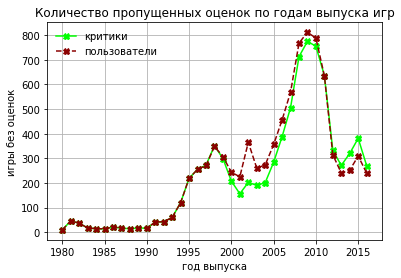

In [32]:
fig, ax = plt.subplots()
ax.set(title='Количество пропущенных оценок по годам выпуска игр',
       xlabel='год выпуска', ylabel='игры без оценок')
ax.plot(critics['year_of_release'], critics['name'], 'X-', color='lime', label='критики')
ax.plot(users['year_of_release'], users['name'], 'X--', color='DarkRed', label='пользователи')
ax.grid()
ax.legend(frameon=False)
plt.show()

На данном графике мы видим резкий рост отсутствия рейтингов в *1995* году и после *2005* с пиковым значением в **2009** году.
Вероятно, это связано с несколькими факторами:
- в эти годы случались *прорывы* в игровой индустрии и критики и пользователи не успевали *распробовать* все игры.
- данные по этим играм просто не были загружены в исходный файл (я больше склоняюсь к этому варианту, потому что со временем все игры обретают рейтинг, так как у пользователей *доходят руки* до них)

In [33]:
len(sales.loc[(sales['critic_score'].isna()==True) & (sales['user_score'].isna()!=True)])

569

Количество игр, у которых отсутствует оценка критиков, но есть оценка пользоватей: **569**

In [34]:
len(sales.loc[(sales['user_score'].isna()==True) & (sales['critic_score'].isna()!=True)])

1091

Количество игр, у которых отсутствует оценка пользователей, но есть оценка критиков: **1091**

In [35]:
len(sales.loc[(sales['critic_score'].isna()==True) & (sales['user_score'].isna()==True)])

7896

Количество игр, у которых отсутствует и оценка критиков, и оценка пользователей: **7896**

<font color='green'>Рейтинг ESRB</font>

In [36]:
sales['rating'].isna().mean().round(2)

0.41

Пропущенных значений в столбце рейтинга ESRB около **41%**. Это значимая величина. Но сами мы заполнить эти данные не можем, так как выставление рейтинга имеет определенные критерии. Единственно верный путь заполнить пропуски - самому искать рейтинг вручную. Это украдет у меня колоссальное количество времени.
Поэтому придется оставить данные с пропусками.
Попробую разобраться, из-за чего это могло произойти

Изучу данные о пропусках по примеру предыдущих рейтингов, а именно - за основу возьму *год выхода* игр.

In [37]:
esrb = (sales
            .loc[sales['rating'].isna()==True]
            .pivot_table(index='year_of_release', values='name', aggfunc='count')
            .reset_index()
            )

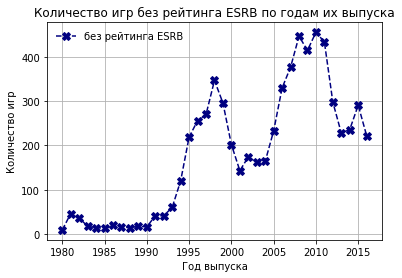

In [38]:
fig, ax = plt.subplots()
ax.set(title='Количество игр без рейтинга ESRB по годам их выпуска',
       xlabel='Год выпуска', ylabel='Количество игр')
ax.plot(esrb['year_of_release'], esrb['name'], 'X--', color='Navy', markersize=8, label='без рейтинга ESRB')
ax.grid()
ax.legend(frameon=False)
plt.show()

Наблюдаю схожую динамику, как и пропуски в рейтингах пользователей и критиков. Скорее всего, это подтверждает мою догадку, что данные не были загружены в датасет. Потому что рейтинг ESRB сейчас присутствует на всех играх, фильмах. И сложно представить, что с 1995 года было не оценено экспертами такое количество игр.

<font color='Red'>Вывод:</font> Я считаю, что пропуски в столбцах рейтинга критиков, пользовательского рейтинга и рейтинга ESRB были допущены по причине **невнесения** этих данных в исходную таблицу. 

In [39]:
sales.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8465
user_score         8987
rating             6681
dtype: int64

Все <font color='blue'>пропуски</font>, которые я мог заменить на логические числа, были предобработаны

# <font color='blue'>Суммарные продажи</font> #

Для того, чтобы расчитать суммарное количество проданных копий по всем регионам, я просуммирую значения по каждому региону.

In [40]:
sales['total_sales'] = sales['na_sales'] + sales['eu_sales'] + sales['jp_sales'] + sales['other_sales']
sales.sample(8)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
13137,Arcana Heart 3,X360,2011,Fighting,0.00,0.02,0.02,0.00,68.0,NaN,T,0.04
5328,Rally Cross 2,PS,1998,Racing,0.19,0.13,0.00,0.02,NaN,NaN,NaN,0.34
15387,Mar Heaven: Karudea no Akuma,DS,2006,Role-Playing,0.00,0.00,0.02,0.00,NaN,NaN,NaN,0.02
9937,Nightshade,PS2,2003,Action,0.06,0.04,0.00,0.01,68.0,7.7,M,0.11
10375,Kamen Rider: Climax Heroes,PS2,2009,Fighting,0.00,0.00,0.11,0.00,NaN,NaN,NaN,0.11
16537,Clive Barker's Jericho,PC,2007,Shooter,0.00,0.01,0.00,0.00,63.0,7.5,M,0.01
3354,From TV Animation One Piece: Grand Battle 2,PS,2002,Fighting,0.00,0.00,0.56,0.04,NaN,NaN,NaN,0.60
8664,MX 2002 Featuring Ricky Carmichael,GBA,2001,Racing,0.11,0.04,0.00,0.00,NaN,NaN,NaN,0.15


# <font color='red'>Вывод</font> #

При предобработке данных мною были сделаны следующие шаги:
- названия столбцов привел к нижнему регистру
- обработал, где возможно, пропуски
- суммарные продажи по всем регионам посчитал и добавил в отдельный столбец
- заменил типы данных, где это было необходимо

Во время обработки данных обнаружил закономерность, что количество пропусков в столбцах с рейтингом пользователей, критиков и рейтингом ESRB было примерно одинаковым по годам. Мое четкое убеждение, что это упущение исходных данных. Так как могут где-то не быть оценены игры пользователями (непопулярная), может игра "пройти мимо" критиков (казуальные, инди-проекты), даже могу допустить, что профессиональные оценщики пропустили игру и она попала на рынок (это крайне маловероятно), но слишком четкая закономерность и похожие графики. Вывод один - данные о рейтингах не были внесены в исходную таблицу.

# <font style="background-color: Cyan; color=black">Исследовательский анализ данных</font> #

<font color='blue'>Количество выпущенных игр за разные годы</font>

In [41]:
games_per_year = sales.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()

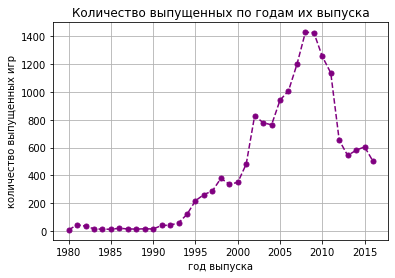

In [42]:
fig, ax = plt.subplots()
ax.set(title='Количество выпущенных по годам их выпуска',
       xlabel='год выпуска', ylabel='количество выпущенных игр')
ax.plot(games_per_year['year_of_release'], games_per_year['name'], 'o--', color='purple', markersize=5)
ax.grid()
plt.show()

Отправной точкой для рынка видеоигр, согласно нашему графику, является **1994** год. Именно с этого момента намечается явный рост по количеству выпущенных видеоигр в год. Яркий всплеск роста выпускаемых игр начался с **2000** года. Для анализа мне нужно избавиться от "хвоста" - "резать" будем от 1994 года.


<font color='blue'>Продажи по платформам</font>

Изучу данные по продажам для каждой игровой платформы.

In [43]:
platform_sales = (sales
                        .pivot_table(index='platform', values='total_sales', aggfunc='sum')
                        .reset_index()
                        .sort_values(by='total_sales', ascending=False)
                        .head(10)
                        .reset_index(drop=True)
                   )
platform_sales

,platform,total_sales
0,PS2,1247.28
1,X360,961.30
2,PS3,931.34
3,Wii,891.18
4,DS,802.79
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.54
9,3DS,257.81


Тот факт, что лидером является PlayStation2, нисколько не удивляет. Известно, что это до сих пор остается самой популярной игровой приставкой в истории и на нее было продано больше всего игр (рейтинг подтверждает). Следом идет XBOX360 и PlayStation3 (что также не удивляет). 

Самым большим откровением для меня стал тот факт, что в рейтинге отсутствует XBOX One. Вероятно, это связано с тем, что у Microsoft очень развита система подписок (Xbox live Gold и Game Pass). С помощью них можно получить цифровую версию игры на время или навсегда. Но тогда игра не будет учитываться, как проданная. (Это было актуально и в 2016 году, и в 2017).

Построю распределение суммарных продаж по годам для каждой платформы из 10 самых популярных.

Для этого создам список из топ 10 консолей

In [44]:
top_consoles = platform_sales['platform']

In [45]:
platform_per_year = (sales
                      .loc[sales['platform'].isin(top_consoles)]
                      .pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')
                      .reset_index()
                 )

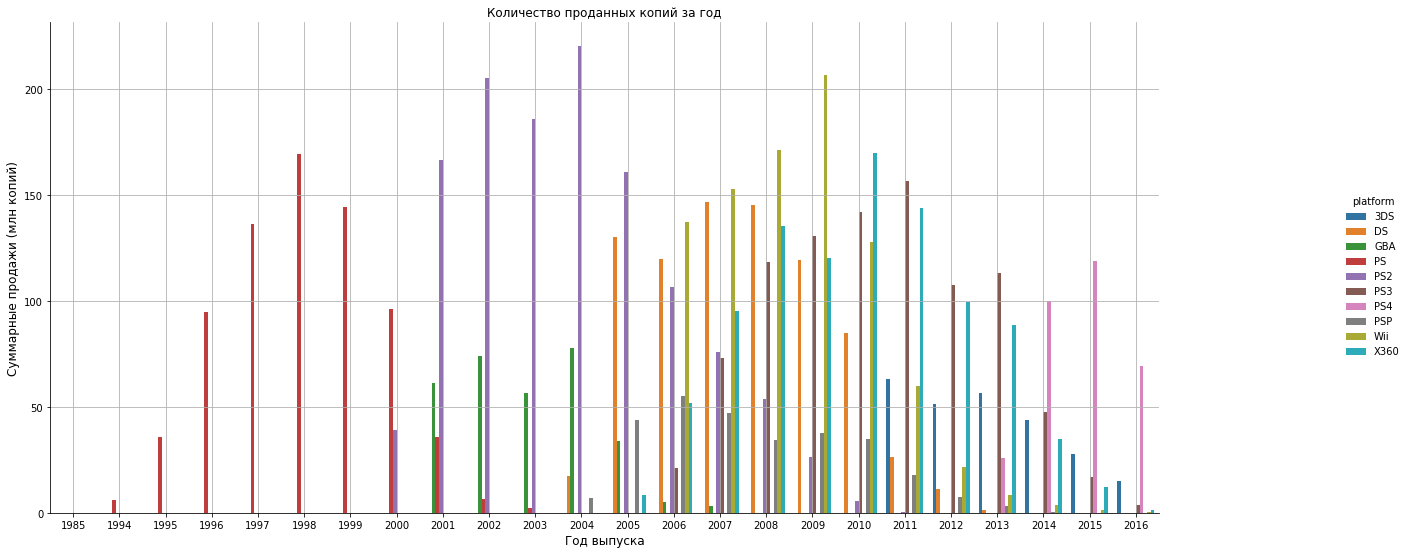

In [46]:
plot = sns.catplot('year_of_release', 'total_sales', hue='platform', kind='bar', data=platform_per_year)
plt.title('Количество проданных копий за год', fontsize=12)
plt.xlabel('Год выпуска', fontsize=12)
plt.ylabel('Суммарные продажи (млн копий)', fontsize=12)
plot.fig.set_size_inches(22,8)
plt.grid()
plt.show()

Самый главный вывод, который можно сделать, глядя на эту таблицу - активный *"жизненный цикл"* каждой консоли составляет **8-10** лет. Постепенно набирая популярность она выходит на пик, затем появляется новая, более современная консоль, а лидер былых лет уходит "на покой".

Как я и говорил раньше, самой популярной консолью была **PlayStation 2**. На самом деле, все консоли от Sony гиперпопулярны. Они смогли захватить рынок и не отпускать его. Обусловлено это и качеством самой приставки, и количеством эклсклюзивных серий игр. На примере **PlayStation 4** можно заметить, что она уже не такая популярная. Связано это может быть с тем, что консоль потеряла свою "изюминку". Да, по-прежнему выходят красивые, качественные игры, но вот невероятных эксклюзивов уже не хватает.

Отдельно хочу отметить рывок **Wii**, которая вошла на рынок в *2006* году и была на пике поулярности в *2009*. Это объяснимо тем, что в то время уже несколько лет существовал и Xbox360 и Playstation3, силы Sony и Microsoft были брошены на разработку новых поколений консолей, нежели на активное поддержание предыдущего поколения. И в этот момент Wii удалось выпустить новый, крайне интересный продукт, который дал импульс рынку и смог завоевать своего покупателя.


<font color='blue'>Анализ **актуального периода**</font>

В качестве **актуального периода** я выберу данные с 2005 по 2015 годы. В 2005 мы видим появление новых консолей, активный интерес покупателей, который только рос с годами. Не взял верхним порогом 2016 год, так как данные по нему выглядят крайне неполными.

In [47]:
actual=sales.query('year_of_release >= 2005 & year_of_release <= 2015')

Главное, что нам нужно учитывать только платформы, которые в данный момент еще пребывают в жизнеспособном состоянии. Потому что в этот период закрались консоли, которые еще продаются, но уже подходят к концу не только продаж, но даже выпуска.

In [48]:
top_actual = actual.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
top_actual

year_of_release,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
platform,,,,,,,,,,,
3DS,NaN,NaN,NaN,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78
DC,NaN,NaN,0.02,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS,130.14,119.81,146.94,145.32,119.54,85.02,26.18,11.01,1.54,NaN,NaN
GBA,33.86,5.28,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GC,27.62,11.26,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PC,4.37,2.85,9.28,12.42,16.91,24.28,35.03,23.22,12.38,13.28,8.52
PS2,160.98,106.46,75.99,53.90,26.40,5.64,0.45,NaN,NaN,NaN,NaN
PS3,NaN,20.96,73.19,118.52,130.93,142.17,156.78,107.36,113.25,47.76,16.82
PS4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.99,100.00,118.90


Я взял за основу тот факт, что *жизненный цикл* консоли составляет 8-10 лет. Возьмем верхний порог (10 лет) и удалим консоли, которые сойдут с рынка в 2017 году (нижний порог ставим **2007** год). Также, у нас уже отсутствуют значения по некоторым консолям за **2015** год. Они свое уже "отработали", их я тоже удалю.

In [49]:
top_actual = top_actual.loc[top_actual[2006].isna()==True].copy()
top_actual.dropna(subset = [2015], inplace = True)
top_actual

year_of_release,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
platform,,,,,,,,,,,
3DS,NaN,NaN,NaN,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78
PS4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.99,100.00,118.90
PSV,NaN,NaN,NaN,NaN,NaN,NaN,4.63,16.19,10.59,11.90,6.25
WiiU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.56,21.65,22.03,16.35
XOne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.96,54.07,60.14


У меня есть топ консолей по продажам, которые сейчас находятся на хорошем этапе "жизненного цикла".
Удалю пустые столбцы и проанализирую данные.

In [50]:
top_actual.drop([2005, 2006, 2007, 2008, 2009, 2010], axis='columns', inplace=True)

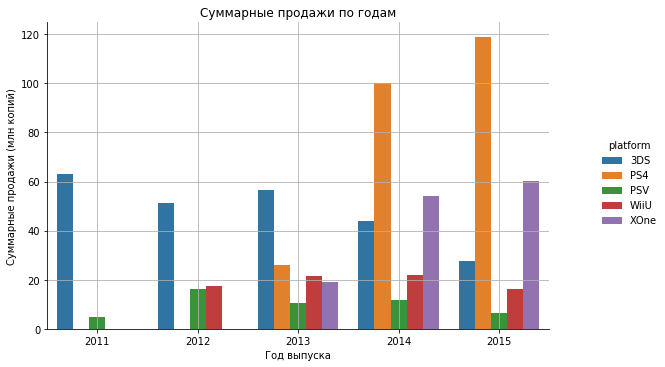

In [51]:
top_actual = (actual
                    .loc[(actual['platform'].isin(("3DS", "PS4", "PSV", "WiiU", "XOne"))==True) & (
                        actual['year_of_release'].isin((2011, 2012, 2013, 2014, 2015))==True)]
                    .pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')
                    .reset_index()
                 )
plot = sns.catplot(x='year_of_release', y='total_sales', hue='platform', kind='bar', data=top_actual)
plt.title('Суммарные продажи по годам', fontsize=12)
plt.xlabel('Год выпуска', fontsize=10)
plt.ylabel('Суммарные продажи (млн копий)', fontsize=10)
plt.grid()
plot.fig.set_size_inches(10,5)

С помощью анализа по "актуальному периоду" получил потенциальные популярные консоли в 2017 году: 
- 3DS, которая уже несколько лет пользуется популярностью у потребителей игр
- PlayStation 4, только набирающая обороты и приносящая самый высокий доход от продаж
- PlayStation Vita, не настолько популярная (что может быть связано с меньшим количеством игр на данной платформе, урезанным качеством и высокой стоиостью), но потенциально прибыльная в ближайшие 2-3 года
- WiiU, являющаяся преемником Wii, которая тоже была достаточно популярна в своё время
- XBoxOne, способный составить достойную конкуренцию PlayStation 4.

Наблюдается подение интереса к платформам 3DS, PlayStation Vita и WiiU, но в 2017 году они еще принесут прибыль и найдут своего покупателя.



<font color='blue'>"Ящики с усами" по глобальным продажам игр</font>

Я выяснил, какие платформы наиболее актуальны сейчас. По ним и буду делать анализ. 

In [52]:
actual_consoles = pd.Series(top_actual['platform'].unique())
popular_games = actual.loc[actual['platform'].isin(actual_consoles)==True].reset_index(drop=True)
popular_games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
1,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
2,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85.0,8.2,E,12.65
3,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
4,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
5,Super Mario 3D Land,3DS,2011,Platform,4.89,3.00,2.14,0.78,90.0,8.4,E,10.81
6,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90
7,Animal Crossing: New Leaf,3DS,2012,Simulation,2.03,2.36,4.39,0.39,88.0,8.7,E,9.17
8,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
9,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98


У меня есть топ игр по продажам для актуальных консолей. Сейчас создам таблицу, которая поможет мне создать "ящики с усами", покажет выбросы.

In [53]:
games_sale = popular_games.pivot_table(index=['platform', 'name'], values='total_sales', aggfunc='sum').reset_index()
games_sale.sample(10)

,platform,name,total_sales
1011,PSV,Tsuki ni Yori Sou Otome no Sahou: Hidamari no ...,0.02
1261,XOne,NBA Live 15,0.21
287,3DS,PAC-MAN and the Ghostly Adventures,0.10
645,PS4,Sword Art Online: Lost Song,0.25
1309,XOne,The Witcher 3: Wild Hunt,1.30
18,3DS,Angry Birds Trilogy,0.63
637,PS4,Skylanders: SuperChargers,0.30
792,PSV,Genkai Tokki Monster Monpiece,0.06
183,3DS,Kamen Rider: Travelers Senki,0.08
331,3DS,Puzzle & Dragons,1.51


У меня есть платформа, наименование игр, их суммарные продажи. Построю боксплоты для каждой консоли

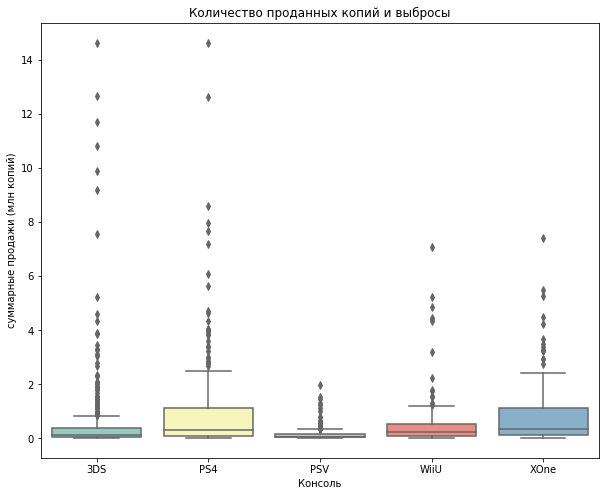

In [54]:
fig = plt.subplots(figsize=(10,8))
plt.title('Количество проданных копий и выбросы')
plot = sns.boxplot(x="platform", y="total_sales", data=games_sale, palette='Set3')
plt.xlabel('Консоль')
plt.ylabel('суммарные продажи (млн копий)')
plt.show()

Из графика видно, что для каждой из игровых консолей существует большое количество игр, суммарные продажи по которым выбиваются из квартильных значений. 
Разница в суммарны продажах для каждой из платформ *велика* для 3DS и PlayStation 4, *чуть меньше* для WiiU и Xbox One, относительно *небольшая* для PlayStation Vita


<font color='blue'>Влияние отзывов пользователей и критиков на покупку игр для популярно консоли</font>

Интересно, как влияют отзывы критиков и пользователей на продажи игр. Возьмем за основу одну популярную платформу. В моем случае это будет Sony PlayStation 4 - актуальная, современная платформа, лидер по продажам.

In [55]:
ps=actual.loc[actual['platform'] == 'PS4']
ps

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
15556,Natsuiro High School: Seishun Hakusho,PS4,2015,Action,0.00,0.00,0.02,0.00,NaN,NaN,NaN,0.02
15762,Rabbids Invasion: The Interactive TV Show,PS4,2014,Misc,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
15943,Professional Farmer 2016,PS4,2015,Action,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16158,Raven's Cry,PS4,2015,Role-Playing,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01


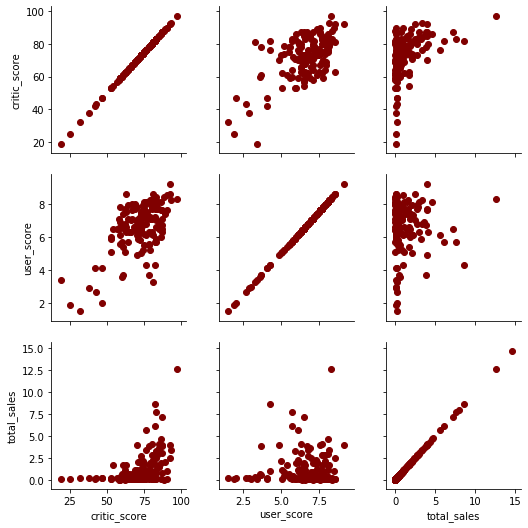

In [56]:
scaterplots = sns.PairGrid(ps[['critic_score', 'user_score', 'total_sales']])
scaterplots.map(plt.scatter, color='Maroon')
plt.show()

In [57]:
correlation = ps.corr().round(2)
correlation

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.00,-0.14,-0.13,-0.01,-0.13,0.00,0.22,-0.14
na_sales,-0.14,1.00,0.81,0.53,0.95,0.44,0.04,0.94
eu_sales,-0.13,0.81,1.00,0.54,0.95,0.37,-0.00,0.96
jp_sales,-0.01,0.53,0.54,1.00,0.56,0.31,0.23,0.59
other_sales,-0.13,0.95,0.95,0.56,1.00,0.43,0.02,1.00
critic_score,0.00,0.44,0.37,0.31,0.43,1.00,0.61,0.43
user_score,0.22,0.04,-0.00,0.23,0.02,0.61,1.00,0.02
total_sales,-0.14,0.94,0.96,0.59,1.00,0.43,0.02,1.00


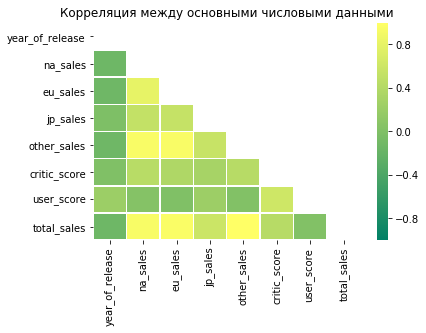

In [58]:
fig, ax = plt.subplots()
plt.title('Корреляция между основными числовыми данными')
mask = np.triu(np.ones_like(correlation, dtype=np.bool))
sns.heatmap(correlation, vmin=-1, vmax=1, linewidths=.5, mask=mask, ax=ax, cmap='summer')
plt.show()

Коэффициент корреляции между рецензиями критиков и совокупными продажами составил **0,43**. По регионам:
- в Северной Америке - 0,44
- в Европе - 0,37
- в Японии - 0,31
- в Остальном мире - 0,43

Это говорит о том, что зависимость есть, но она не играет решающую роль. Схожий вывод можно сделать из диаграммы рассеивания: игры с низкими оценками критиков практически не продаются, в то время как игры с высокими оценками имеют больше продаж. Это может быть связано с тем, что люди действительно изучают рейтинги, смотрят обзоры, читают статьи об игре, прежде, чем ее купить. Но корреляция невысокая, соответственно, это не ключевой показатель. Однако, надо понимать, что чем более игра разрекламированна, тем больше она привлечет к себе внимания и критиков, и пользователей, и тем больше получит оценок.

Коэффициент корреляции между оценкой покупателей и совокупными продажами составил **0,02**, что говорит об отсутствии зависимости между этими показателями. При этом диаграмма рассения схожа с диаграммой рассеяния по оценкам критиков продажам, но имеет больший разброс при низких оценках. Это может быть связано с тем, что пользователь покупает игры и потом уже сам ставит ей оценку. То есть продажи идут, а рейтинг обновляется уже после.

<font color='red'>Вывод:</font> оценка пользователей не влияет на продажи игр для Sony PlayStation 4

<font color='blue'>Влияние отзывов пользователей и критиков на покупку игр для остальных консолей</font>

Проверю, как сильно влияют аналогичне показатели на непопулярные игровые консоли

In [59]:
other=actual.loc[actual['platform'].isin(actual_consoles)!=True].reset_index(drop=True)

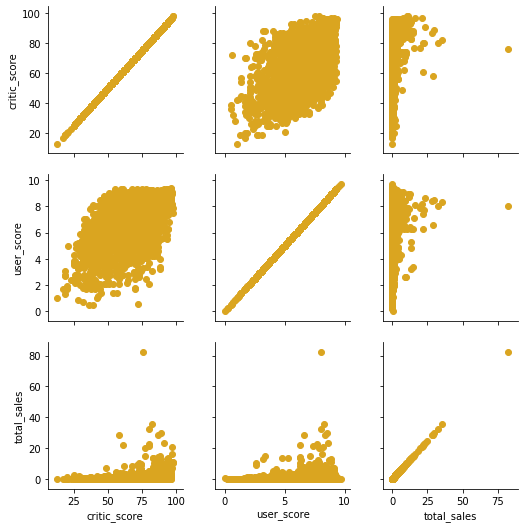

In [60]:
scaterplots = sns.PairGrid(other[['critic_score', 'user_score', 'total_sales']])
scaterplots.map(plt.scatter, color='Goldenrod')
plt.show()

In [61]:
correlation = other.corr().round(2)
correlation

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.00,-0.02,0.03,-0.03,0.00,0.08,-0.20,-0.00
na_sales,-0.02,1.00,0.87,0.45,0.82,0.22,0.07,0.96
eu_sales,0.03,0.87,1.00,0.51,0.87,0.21,0.06,0.95
jp_sales,-0.03,0.45,0.51,1.00,0.45,0.13,0.11,0.60
other_sales,0.00,0.82,0.87,0.45,1.00,0.23,0.08,0.89
critic_score,0.08,0.22,0.21,0.13,0.23,1.00,0.57,0.23
user_score,-0.20,0.07,0.06,0.11,0.08,0.57,1.00,0.08
total_sales,-0.00,0.96,0.95,0.60,0.89,0.23,0.08,1.00


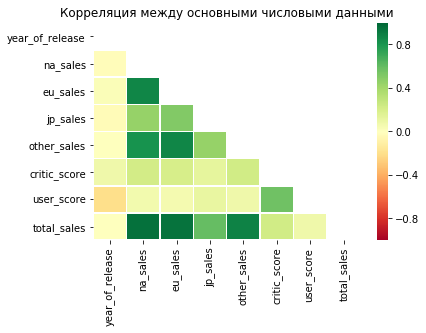

In [62]:
fig, ax = plt.subplots()
plt.title('Корреляция между основными числовыми данными')
mask = np.triu(np.ones_like(correlation, dtype=np.bool))
sns.heatmap(correlation, vmin=-1, vmax=1, linewidths=.5, mask=mask, ax=ax, cmap='RdYlGn')
plt.show()

Коэффициент корреляции между оценкой критиков и совокупными продажами для непопулярных платформ составил **0,23**. По регионам:
- в Северной Америке - 0,22
- в Европе - 0,21
- в Японии - 0,13
- в Остальном мире - 0,23

Данные идентичны и говорят о том, что во всем мире отзывы критиков не влияют на продажи игр для непопулярных консолей.
Вероятно, это связано с тем, что у непопулярных игровых консолей большинство пользователей - фанаты, которым нравится большинство игр именно для этой платформы и им не интересны отзывы критиков, как и пользовательские отзывы (показатель всего **0,08**).

<font color='red'>Вывод:</font> сравнив влияние отзывов критиков и пользователей на продажи игр для популярной консоли (PlayStation 4) и группой непопулярных игровых консолей, пришли к выводу, что в эти показатели не оказывают существенного влияния на продажи игр. Причем для второй группы это даже более заметно


<font color='blue'>Распределение игр по жанрам</font>

Для того, чтобы проанализировать показатели продаж игр непосредственно по жанрам, построю боксплоты для каждого жанра

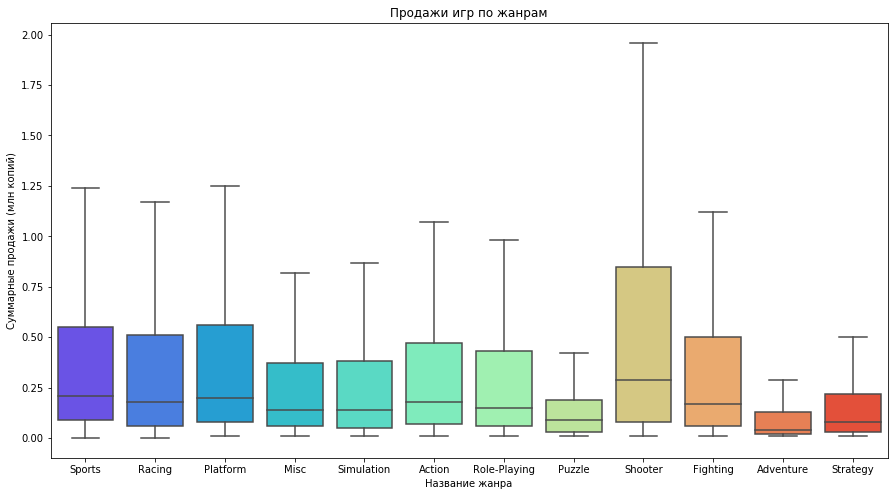

In [63]:
fig = plt.subplots(figsize=(15,8))
plt.title('Продажи игр по жанрам')
plot = sns.boxplot(x="genre", y="total_sales", data=actual, palette='rainbow', showfliers=False)
plt.xlabel('Название жанра')
plt.ylabel('Суммарные продажи (млн копий)')
plt.show()

Ниже создам таблицу, где у меня будут жанры в порядке убывания по суммарным продажам.

In [64]:
(actual
    .pivot_table(index='genre', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .reset_index()
)

,genre,total_sales
0,Action,1171.93
1,Sports,830.35
2,Shooter,720.34
3,Misc,613.23
4,Role-Playing,532.60
5,Racing,352.33
6,Platform,299.83
7,Simulation,267.73
8,Fighting,206.60
9,Adventure,145.99


<font color='red'>Вывод:</font> самый популярны жанр - Action. Это не удивительно, так как на консолях больше всего игр именно этого жанра. На втором месте - Sport. С развитием видеоблогерства (в 2016 особо было заметно), фанбаза спортивных игр для консолей только увеличивалась. Также спортивные игры покупают владельцы кафе, где можно поиграть с друзьями, да и обычные владельцы консолей покупают спортивные игры, потому что в них можно интересно поиграть с родными, товарищами, партнером.

Наиболее низкие продажи в жанре - Strategy. Здесь тоже нет ничего удивительного: данные игры действительно не самые популярные, их мало на консолях (в основном связано с дискомфортом управления), но эта ниша всегда найдет своего покупателя, в любое время.

Интересная ситуация с третьей позицией - Shooter. Это самое доходное, в среднем, направление игр, пользующееся высоким спросом. Средний и медианный уровни продаж этого жанра выше значений по любому другому жанру; а также датасет в разрезе данного жанра сильно скошен вправо (какие-то игры покупаются в очень большом количестве), а значит, это перспективное направление для продажи.

# <font color='red'>Вывод</font> #

Проведя *исследовательский анализ данных* я выявил, что в разные годы были популярны разные игры, разные платформы. Особо на общем фоне выделяются консоли от Sony: лидерство PlayStation, затем лидерство PlayStation 2 (абсолютный мировой лидер), PlayStation 3 тоже в топе. Неплохо проявила себ приставка Nintndo Wii, которая была выпущена вовремя и действительно выстрелила на рынке игровых консолей. "Жизненный цикл" игровых консолей составляет 8-10 лет.

Смело могу заявить, что для полноценного анализа данных по игровым консолям, данные до 1994 года можно не брать в расчет. Выходило крайне мало игр, не было четкого лидера среди консолей. Интересным для меня является период с 2005 года, когда на рынке начинают появляться новые консоли, их становится больше, конкуренция растет.

Изучив связь между оценками критиков и пользователей и продажами, я пришел к выводу, что между ними есть слабая связь, причём для самой популярной платформы (PlayStation 4) она чуть сильнее. и между оценкой пользователей и совокупными продажами нет связи (ни для популярных, ни для непопулярных платформ). С одной стороны, это может быть связано с тем, что люди обращают внимание на оценку игры, прежде чем покупают её (но корреляция невысокая, соответственно, это не ключевой показатель). С другой стороны, возможно, критиками оцениваются не все игры, а наиболее популярные у покупателей (или потенциально популярные). Но главное, что эти оценки не оказывают тотального влияние на продажи. На них влияют другие факторы.

Анализируя данные по продажам было выявлено топ 3 самых популярных жанров:
- Action
- Sport
- Shooter

Но это не стало для меня открытием, так как на консолях больше всего игр именно этих жанров. 
Меньше всего покупают Strategy, но этот жанр игр ближе к Персональным компьютерам, а не к консолям.

# <font style="background-color: Cyan; color=black">Портрет пользователя для каждого региона</font> #

Для каждого региона определю своего пользователя. В основу лягут 3 основные характеристики - топ-5 популярных платформ, топ-5 популярных жанров, влияние рейтинга ESRB.

<font color='blue'>Топ-5 популярных платформ</font>

<font color='green'>Северная Америка</font>

In [65]:
na_games = (actual
                .pivot_table(index='platform', values='na_sales', aggfunc='sum')
                .sort_values(by='na_sales', ascending=False)
                .reset_index()
            )
na_games['na_ratio'] = round(na_games['na_sales'] / sum(na_games['na_sales']), 2)
na_top_games = na_games.head(5)
na_top_games

,platform,na_sales,na_ratio
0,X360,595.05,0.23
1,Wii,486.81,0.19
2,PS3,389.46,0.15
3,DS,371.99,0.14
4,PS2,202.22,0.08


В *Северной Америке* самыми популярными платформами являются XBox 360 (**23%** от общего рынка), Wii, PlayStation 3, DS и PlayStation 2.

Рассмотрим продаваемость игр на самых перспективных и популярных платформах на данный момент

In [66]:
na_actual = na_games.loc[na_games['platform'].isin(actual_consoles)==True]
na_actual

,platform,na_sales,na_ratio
6,PS4,87.25,0.03
7,XOne,78.85,0.03
8,3DS,78.51,0.03
11,WiiU,36.00,0.01
14,PSV,12.32,0.00


PlayStation 4 и Xbox One вплотную приближаются к лидерам. Возможно, в 2017 году произойдет рывок этих консолей на рынке Северной Америки

<font color='green'>Европа</font>

In [67]:
eu_games = (actual
                .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
                .sort_values(by='eu_sales', ascending=False)
                .reset_index()
            )
eu_games['eu_ratio'] = round(eu_games['eu_sales'] / sum(eu_games['eu_sales']), 2)
eu_top_games = eu_games.head(5)
eu_top_games

,platform,eu_sales,eu_ratio
0,PS3,325.95,0.21
1,X360,267.66,0.17
2,Wii,258.21,0.16
3,DS,184.48,0.12
4,PS4,109.31,0.07


В Европе большую часть рынка захватил PlayStation 3. Интересно, что в Топ-5 входит PlayStation 4 с солидными **7%** (против 3% в Северной Америке)

In [68]:
eu_actual = eu_games.loc[eu_games['platform'].isin(actual_consoles)==True]
eu_actual

,platform,eu_sales,eu_ratio
4,PS4,109.31,0.07
8,3DS,58.94,0.04
9,XOne,41.96,0.03
10,WiiU,23.65,0.02
12,PSV,12.68,0.01


Среди актуальных консолей в Европе проигрывает свои позиции Xbox One, хоть и держит уровень в **3%**

<font color='green'>Япония</font>

In [69]:
jp_games = (actual
                .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
                .sort_values(by='jp_sales', ascending=False)
                .reset_index()
            )
jp_games['jp_ratio'] = round(jp_games['jp_sales'] / sum(jp_games['jp_sales']), 2)
jp_top_games = jp_games.head(5)
jp_top_games

,platform,jp_sales,jp_ratio
0,DS,171.35,0.29
1,3DS,92.59,0.16
2,PS3,78.11,0.13
3,PSP,73.85,0.12
4,Wii,68.28,0.11


Япония заметно отличается от всех остальных (это не удивительно, у них своя культура видеоигр). Поэтому с большим отрывом у них на первом месте DS и **29%**, следом идет 3DS, PlayStation 3, PSP.

Вероятно, это обусловлено тем, что японцы предпочитают игры на портативных устройствах, а не стационарных (DS, 3DS, Vita в топе).

In [70]:
jp_actual = jp_games.loc[jp_games['platform'].isin(actual_consoles)==True]
jp_actual

,platform,jp_sales,jp_ratio
1,3DS,92.59,0.16
6,PSV,18.28,0.03
7,WiiU,12.34,0.02
9,PS4,10.22,0.02
12,XOne,0.33,0.00


Xbox One совсем не популярен в Японии, PlayStation 4 тоже проигрывает позиции. А из актуальных и перспективных первое место уверенно занимает 3DS.

Сравню показатели и опишу *доли продаж*

In [71]:
top_games = na_top_games.merge(eu_top_games, on=['platform'], how='outer')
top_games = top_games.merge(jp_top_games, on=['platform'], how='outer')
top_games.drop(['na_sales', 'eu_sales', 'jp_sales'], axis='columns', inplace=True)
top_games.sort_values(by='platform').reset_index(drop=True)

,platform,na_ratio,eu_ratio,jp_ratio
0,3DS,NaN,NaN,0.16
1,DS,0.14,0.12,0.29
2,PS2,0.08,NaN,NaN
3,PS3,0.15,0.21,0.13
4,PS4,NaN,0.07,NaN
5,PSP,NaN,NaN,0.12
6,Wii,0.19,0.16,0.11
7,X360,0.23,0.17,NaN


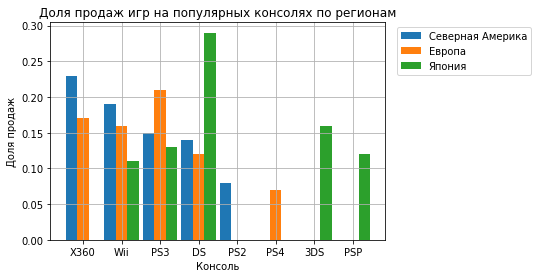

In [72]:
fig, ax = plt.subplots()
ax.set(title='Доля продаж игр на популярных консолях по регионам',
       xlabel='Консоль', ylabel='Доля продаж')
x1 = np.arange(1,9) - 0.3
x2 = np.arange(1,9)
x3 = np.arange(1,9) + 0.3
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8], ['X360', 'Wii', 'PS3', 'DS', 'PS2', 'PS4', '3DS', 'PSP'])
ax.bar(x1, top_games['na_ratio'], width=0.3, label='Северная Америка')
ax.bar(x2, top_games['eu_ratio'], width=0.3, label='Европа')
ax.bar(x3, top_games['jp_ratio'], width=0.3, label='Япония')
ax.grid()
ax.legend(bbox_to_anchor=(1.45, 1), frameon=True, loc='upper right')
plt.show()

В Северной Америке наиболее популярны игры на платформе XBox 360 - **23%**, на этой же платформе достаточно популярны игры в Европе - **17%**, в Японии они не продавались. 

В Европе самыми популярными являются игры на Playstation3 - **21%**, на этой же платформе достаточно популярны игры в Северной Америке - **15%**, и в Японии - **14%**. 

В Японии наиболее продаваемыми являются игры на платформе DS - **29%**, платформа менее популярна в Северной Америке - **14%**, в Европе - **12%**. 

Во всех регионах игры на платформе Wii: в Северной Америке продажи составили **19%** , в Европе - **16%**, в Японии - **11%**.

Соберу данные по актуальным и потенциально прибыльным платформам в регионах, сравню показатели

In [73]:
actual_new_games = na_actual.merge(eu_actual, on=['platform'], how='outer')
actual_new_games = actual_new_games.merge(jp_actual, on=['platform'], how='outer')
actual_new_games.drop(['na_sales', 'eu_sales', 'jp_sales'], axis='columns', inplace=True)
actual_new_games.sort_values(by='platform').reset_index(drop=True)

,platform,na_ratio,eu_ratio,jp_ratio
0,3DS,0.03,0.04,0.16
1,PS4,0.03,0.07,0.02
2,PSV,0.00,0.01,0.03
3,WiiU,0.01,0.02,0.02
4,XOne,0.03,0.03,0.00


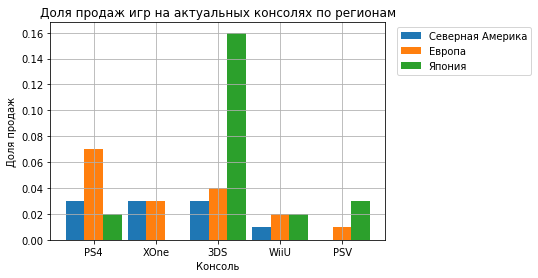

In [74]:
fig, ax = plt.subplots()
ax.set(title='Доля продаж игр на актуальных консолях по регионам',
       xlabel='Консоль', ylabel='Доля продаж')
x1 = np.arange(1,6) - 0.3
x2 = np.arange(1,6)
x3 = np.arange(1,6) + 0.3
plt.xticks([1, 2, 3, 4, 5], ['PS4', 'XOne', '3DS', 'WiiU', 'PSV'])
ax.bar(x1, actual_new_games['na_ratio'], width=0.3, label='Северная Америка')
ax.bar(x2, actual_new_games['eu_ratio'], width=0.3, label='Европа')
ax.bar(x3, actual_new_games['jp_ratio'], width=0.3, label='Япония')
ax.grid()
ax.legend(bbox_to_anchor=(1.45, 1), frameon=True, loc='upper right')
plt.show()

Для актуальных и перспективных консолей на 2017 год можно заметить следующие распределения долей по продажам в регионах:
- Северная Америка - примерно поровну распределился рынок между PlayStation 4, Xbox One и 3DS (по **3%**)
- Европа - наиболее популярна Playstation4 - **7%**, следом идет 3DS и **4%**
- Япония - самая популярная - 3DS - **16%**, на втором месте (но с большим отставанием) - PlayStation Vita (**3%**)

Такие небольшие объёмы продаж свидетельствуют о том, что данные консоли только набирают ход. В ближайшее время должен случиться прорыв.

<font color='blue'>Топ-5 жанров</font>

<font color='green'>Северная Америка</font>

In [75]:
na_genres = (actual
                .pivot_table(index='genre', values='na_sales', aggfunc='sum')
                .sort_values(by='na_sales', ascending=False)
                .reset_index()
                )
na_genres['na_ratio'] = round(na_genres['na_sales'] / sum(na_genres['na_sales']), 2)
na_popular_genres = na_genres.head(5)
na_popular_genres

,genre,na_sales,na_ratio
0,Action,570.75,0.22
1,Sports,425.45,0.16
2,Shooter,384.72,0.15
3,Misc,311.06,0.12
4,Role-Playing,205.96,0.08


Доли рынка в Северной Америке среди популярных жанров распределены:
- Action - **22%**
- Sports - **16%**
- Shooter - **15%**
- Misc - **12%**
- Role-Playing - **8%**

<font color='green'>Европа</font>

In [76]:
eu_genres = (actual
                .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
                .sort_values(by='eu_sales', ascending=False)
                .reset_index()
                )
eu_genres['eu_ratio'] = round(eu_genres['eu_sales'] / sum(eu_genres['eu_sales']), 2)
eu_popular_genres = eu_genres.head(5)
eu_popular_genres

,genre,eu_sales,eu_ratio
0,Action,361.90,0.23
1,Sports,253.76,0.16
2,Shooter,232.17,0.15
3,Misc,166.43,0.11
4,Racing,127.32,0.08


Доли рынка в Европе среди популярных жанров распределены:
- Action - **23%**
- Sports - **16%**
- Shooter - **15%**
- Misc - **11%**
- Role-Playing - **8%**

<font color='green'>Япония</font>

In [77]:
jp_genres = (actual
                .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
                .sort_values(by='jp_sales', ascending=False)
                .reset_index()
                )
jp_genres['jp_ratio'] = round(jp_genres['jp_sales'] / sum(jp_genres['jp_sales']), 2)
jp_popular_genres = jp_genres.head(5)
jp_popular_genres

,genre,jp_sales,jp_ratio
0,Role-Playing,172.99,0.29
1,Action,101.32,0.17
2,Misc,71.45,0.12
3,Sports,51.59,0.09
4,Platform,36.21,0.06


Доли рынка в Японии среди популярных жанров распределены:
- Role-Playing - **29%**
- Action - **17%**
- Misc - **12%**
- Sports - **9%**
- platform - **6%**

<font color='green'>Таблица по всем регионам</font>

In [78]:
popular_genres = na_popular_genres.merge(eu_popular_genres, on=['genre'], how='outer')
popular_genres = popular_genres.merge(jp_popular_genres, on=['genre'], how='outer')
popular_genres.drop(['na_sales', 'eu_sales', 'jp_sales'], axis='columns', inplace=True)
popular_genres.sort_values(by='genre').reset_index(drop=True)

,genre,na_ratio,eu_ratio,jp_ratio
0,Action,0.22,0.23,0.17
1,Misc,0.12,0.11,0.12
2,Platform,NaN,NaN,0.06
3,Racing,NaN,0.08,NaN
4,Role-Playing,0.08,NaN,0.29
5,Shooter,0.15,0.15,NaN
6,Sports,0.16,0.16,0.09


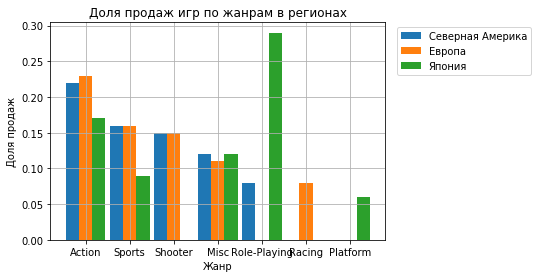

In [79]:
fig, ax = plt.subplots()
ax.set(title='Доля продаж игр по жанрам в регионах',
       xlabel='Жанр', ylabel='Доля продаж')
x1 = np.arange(1,8) - 0.3
x2 = np.arange(1,8)
x3 = np.arange(1,8) + 0.3
plt.xticks([1, 2, 3, 4, 5, 6, 7], ['Action', 'Sports', 'Shooter', 'Misc', 'Role-Playing', 'Racing', 'Platform'])
ax.bar(x1, popular_genres['na_ratio'], width=0.3, label='Северная Америка')
ax.bar(x2, popular_genres['eu_ratio'], width=0.3, label='Европа')
ax.bar(x3, popular_genres['jp_ratio'], width=0.3, label='Япония')
ax.grid()
ax.legend(bbox_to_anchor=(1.45, 1), frameon=True, loc='upper right')
plt.show()

Жанр Action популярен во всех трёх регионах и находится примерно на одном урове (разве что в Японии чуть проседает).

В Японии самым популярным жанром считается Role-Playing (RPG) (**29%**), и это не удивительно, так как один из самых популярных поджанров - RPG с пошаговым, тактическим боем. Таие игры очень популярны на портативных устройствах. В Северной Америке доля данных игр составила - 6%, а вот в Европе совсем не пользуется данный жанр популярностью.

Интересно отметить игры, которые не относятся, как таковые, ни к одному жанру - Misc. А у них солидный уровень доли рынка (по **12%** в Японии и Северной Америке, **11%** в Европе). Эти игры еще называют "игры для компаний" - Just Dance (потанцевать), например. Популярноть этих игр обусловлена возможностью весело провести время с друзья, потренироваться. 

Различия в приверженности к жанрам может быть связано с образом жизни: в Японии постоянное движение, поэтому там так популярны портативные консоли. Если прибавить к этому RPG-игры в стиле аниме, то мы получаем ответ, почему они пользуются такой популярностью. В Европе популярны Racing (гонки) - как известно, в Европе множетсво трасс для Формулы-1, известных гонщиков. У них это крайне популярно, отсюда и любовь к этому жанру игр. 

Популярность Action и Shooter не должна вызывать удивления, так как эти жанры в принципе идут рука об руку, а на консолях множество игр этих жанров.


<font color='blue'>Влияние рейтинга ESRB на продажи</font>

<font color='green'>Северная Америка</font>

In [80]:
na_esrb = (actual
                .pivot_table(index='rating', values='na_sales', aggfunc='sum')
                .sort_values(by='na_sales', ascending=False)
                .reset_index()
                )
na_esrb['na_ratio'] = round(na_esrb['na_sales'] / sum(na_esrb['na_sales']), 2)
na_esrb

,rating,na_sales,na_ratio
0,E,865.40,0.38
1,M,591.67,0.26
2,T,470.13,0.21
3,E10+,339.22,0.15
4,EC,1.53,0.00
5,AO,1.26,0.00
6,RP,0.00,0.00


Доли рынка в Северной Америке по рейтингу ESRB:

- E("Everyone") — «Для всех» - **38%**
- M («Mature») — «Для взрослых» - **26%**
- T («Teen») — «Подросткам» - **21%**
- E10+ ("Everyone 10 and older") — «Для всех от 10 лет и старше» - **15%**

<font color='green'>Европа</font>

In [81]:
eu_esrb = (actual
                .pivot_table(index='rating', values='eu_sales', aggfunc='sum')
                .sort_values(by='eu_sales', ascending=False)
                .reset_index()
                )
eu_esrb['eu_ratio'] = round(eu_esrb['eu_sales'] / sum(eu_esrb['eu_sales']), 2)
eu_esrb

,rating,eu_sales,eu_ratio
0,E,495.25,0.38
1,M,397.57,0.30
2,T,248.38,0.19
3,E10+,178.11,0.13
4,AO,0.61,0.00
5,EC,0.11,0.00
6,RP,0.03,0.00


Доли рынка в Европе по рейтингу ESRB:

- E("Everyone") — «Для всех» - **38%**
- M («Mature») — «Для взрослых» - **30%**
- T («Teen») — «Подросткам» - **19%**
- E10+ ("Everyone 10 and older") — «Для всех от 10 лет и старше» - **13%**

<font color='green'>Япония</font>

In [82]:
jp_esrb = (actual
                .pivot_table(index='rating', values='jp_sales', aggfunc='sum')
                .sort_values(by='jp_sales', ascending=False)
                .reset_index()
                )
jp_esrb['jp_ratio'] = round(jp_esrb['jp_sales'] / sum(jp_esrb['jp_sales']), 2)
jp_esrb

,rating,jp_sales,jp_ratio
0,E,146.26,0.46
1,T,89.05,0.28
2,M,45.03,0.14
3,E10+,38.60,0.12
4,AO,0.00,0.00
5,EC,0.00,0.00
6,RP,0.00,0.00


Доли рынка в Японии по рейтингу ESRB:

- E("Everyone") — «Для всех» - **46%**
- M («Mature») — «Для взрослых» - **14%**
- T («Teen») — «Подросткам» - **28%**
- E10+ ("Everyone 10 and older") — «Для всех от 10 лет и старше» - **12%**

Данные по всем регионам примерно одинаковые. Больше всего игр продается с рейтингом E("Everyove") - это не удивительно, так как большинство игр, представленных на рынке, выходят с таким рейтингом. 

Заметно отличие, что в Японии игры с рейтингом T («Teen») более популярны, чем игры для взрослых. Но это не означает, что игры покупают исключительно подростки.

На все остальные рейтинг спрос чрезвычайно мал везде. 


# <font color='red'>Вывод</font> #

Моей целью было создать **портрет пользователя каждого региона**. В действительности, данные позволяют мне предположить, каким выглядит покупатель в каждом регионе.

В Северной Америке: наиболее популярна игровая приставка Xbox 360, из актуальных подбираются PlayStation 4 и Xbox one. Получается, американский потребитель скорее патриот, так как покупает продукцию Microsoft. Значит в 2017 году должен произойти резкий рост продаж консоли Xbox one в этом регионе. Пользователи предпочитают жанры Action, Sports и Shooter. Это объясняет, почему издатели игр стараются выпускать игры популярных серий каждый год (Call of duty, Assassins Creed), ведь самый покупаемый регион как раз Северная Америка, нельзя упускать такую "рыбу". И при этом здесь любят покупать игры E, для всех. Значит типичный потребитель в Северной Америке - любит расслабиться и пострелять в какой-нибудь игре, либо порубать мечом или каким другим приспособлением, тем самым скоротав время. Обязательно купит себе очередную часть спортивного симулятора, вель у него в колледже/школе обязательно есть футбольная команда, или хоккейная секция, или баскетбольная команда, а, значит, придут друзья, с которыми можно поиграть (либо через интернет). Но он может быть взрослым, тогда он обязательно купит себе или Just Dance, или guitar hero, потому что кто не мечтал играть настоящий рок в гараже.

В Европе: самая популярная приставка - Playstation 3, из актуальных вырывается вперед PlayStation 4. И как тут не вспомнить, что европейцы очень любят гонки. А ведь только на Playstation выходит эксклюзивная серия игр Gran Turismo, где можно покататься по прекрасным европейским улочкам, представляя себя кумиром детства (например, Шумахер). Про популярность жанра Sports даже и предполагать не надо, ведь Европа - центр мирового футбола (небольшое отступление - популярность видеоигры FIFA подтвердилось в очередной раз в этом году (федерация ФИФА за 2020 год получила от видеоигр дохода больше, чем от самого футбола), конечно, сказался коронавирус, но ведь это показатель). А жанры Action и Shooter здесь также популярны, ведь это самый простой способ отвлечься и погрузиться в интересный мир.

В Японии: удивительная страна - Япония. И покупатели игр здесь удивительные. Самые популярные приставки - DS, 3DS и PSV. Как я говорил выше - у них бешеный ритм жизни, поэтому много времени они проодят на ногах, либо в транспорте. Поэтому так популярны у них портативные консоли. А их любовь к фентези, аниме и волшебству породило огромный спрос на RPG игры, где можно отыграть роль любимого персонажа. Этим во многом и объясняется тот факт, что у них популярен рейтинг T, для подростков, ведь такие игры не содержат ничего запретного. Но в тоже время их рынок видеоигр крайне специфичен, существует множество игр, которые не доходят о остального мира.

# <font style="background-color: Cyan; color=black">Проверка гипотез</font> #

<font color='blue'>Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые</font>

Буду анализировать две генеральные совокупности: рейтинг пользователей игр Xbox One и PC

In [83]:
xboxone = actual.loc[(actual['user_score'].isna()!=True) & (actual['platform'] == "XOne")]
pc = actual.loc[(actual['user_score'].isna()!=True) & (actual['platform'] == "PC")]

Проверю, что сравниваемые выборки имеют нормальное распределение

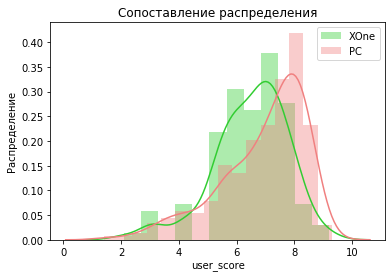

In [84]:
fig = plt.figure()
plt.xlabel('xlabel')
plt.ylabel('Распределение')
plt.title('Сопоставление распределения')
sns.distplot(xboxone['user_score'], label='XOne', color='LimeGreen')
sns.distplot(pc['user_score'], label='PC', color='LightCoral')
plt.legend()
plt.show()

Данные распределены нормально,немного смещены вправо.

Нулевая гипотеза H0: Средние двух генеральных совокупностей равны между собой.

Альтернативная гипотеза H1: Средние двух генеральных совокупностей не равны между собой.

xboxone и pc - это не совсем генеральные совокупности, а скорее, выборки; но согласно *центральной предельной теореме*, выборочные средние распределены нормально вокруг истинного среднего генеральной совокупности. 

Eровень значимости, определяющий близость к среднему значению: 5%.

Дисперсия каждой выборки должна быть оценена по датасету каждой из выборок, а не по их объединению. Также отметим, что выборки являются независимыми.

Проверим гипотезы через распределение t-Стьюдента.

In [85]:
sample_1 = xboxone['user_score']
sample_2 = pc['user_score']

alpha = 0.05

results = st.ttest_ind(sample_1, sample_2, equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

p-значение: 0.0009390620930121275
Отвергаем нулевую гипотезу.


p-значение оказалось меньше уровня значимости в 5%. Мы отвергли нулевую гипотезу; приняли альтернативную гипотезу: средние двух генеральных совокупностей не равны между собой.

<font color='red'>Вывод:</font> средние пользовательские рейтинги платформ Xbox One и PC *различаются*.

<font color='blue'>Гипотеза 2. Cредние пользовательские рейтинги жанров Action и Sports разные</font>

Анализирую две генеральные совокупности: рейтинг пользователей игр в жанрах Action и Sports 

In [86]:
action = actual.loc[(actual['user_score'].isna()!=True) & (actual['genre'] == "Action")]
sports = actual.loc[(actual['user_score'].isna()!=True) & (actual['genre'] == "Sports")]

Проверю, что сравниваемые выборки имеют нормальное распределение

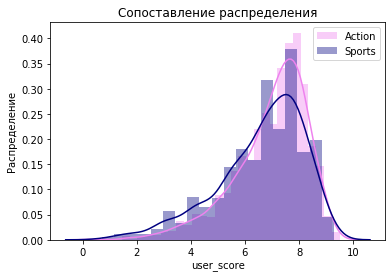

In [87]:

fig = plt.figure()
plt.xlabel('xlabel')
plt.ylabel('Распределение')
plt.title('Сопоставление распределения')
sns.distplot(action['user_score'], label='Action', color='Violet')
sns.distplot(sports['user_score'], label='Sports', color='Navy')
plt.legend()
plt.show()

Данные немного смещены вправо, имеют нормальное распределение.

Нулевую гипотезу H0: Средние двух генеральных совокупностей равны между собой.

Альтернативная гипотеза H1: Средние двух генераальных совокупностей не равны между собой.

action и sports - это не совсем генеральные совокупности, а скорее, выборки; но согласно *центральной предельной теореме*, выборочные средние распределены нормально вокруг истинного среднего генеральной совокупности.

Уровень значимости, определяющий близость к среднему значению: 5%.

Кроме того, дисперсия каждой выборки должна быть оценена по датасету каждой из выборок, а не по их объединению. Выборки являются независимыми.

Проверим гипотезы через распределение t-Стьюдента.

In [88]:
sample_1 = action['user_score']
sample_2 = sports['user_score']

alpha = 0.05

results = st.ttest_ind(sample_1, sample_2, equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

p-значение: 2.2385740793260452e-07
Отвергаем нулевую гипотезу.


p-значение оказалось меньше уровня значимости в 5%. Мы отвергли нулевую гипотезу; приняли альтернативную гипотезу: средние двух генеральных совокупностей не равны между собой.

<font color='red'>Вывод:</font> средние пользовательские рейтинги жанров Action и Sports различаются.

<div style="border:solid green 2px; padding: 20px"> 

# <font color='red'>Вывод</font> #

С помощью t-тестов проверки двусторонних гипотез для двух независимых выборок я получил результат, что средние пользовательские рейтинги платформ Xbox One и PC различаются, средние пользовательские рейтинги жанров Action и Sports также различаются.

# <font style="background-color: Cyan; color=black">Общий вывод</font> #

Я провел исследование рынка компьютерных игр, на который ориентируется в своей деятельности интернет-магазин «Стримчик», продающий игры по всему миру. 

При предобработке данных я выявил, что присутствуют пропуски в столбцах рейтингов критиков, пользователей и рейтинга ESRB. Данные пропуски показались мне необычными, сверил на графиках, взяв за основу год выхода игры, и получил, что данные почти идентичны. Я твердо убежден, что было допущено некорректное заполнение данных, и рейтинг не внесли.
Часть пропусков была связана с показателем tbd (to be determined): игра была оценена, но система не посчитала рейтинг на момент выгрузки данных.

С помощью исследовательского анализа я узнал, что в разные годы были популярны игры на разных платформах. Игры на PlayStation набирали популярность с 1994 года, достигли пика по продажам в 1990 году и "сошли на нет" в 2002-2003 годах. Им на замену в 2000 году пришли игры на PlayStation 2, которая в итоге стала абсолютным лидером и рекордсменом по продажам. 

В 2004 году выходит на рынок DS, которая сходу обретает популярность.

Практически в то же время (с 2006 по 2010 гг. с пиком в 2009 г.) были популярны игры на платформе Wii (с самой малоразмерной на тот момент приставкой Nintendo Wii). В те же годы на смену PlayStation 2 пришли игры на платформе PlaySstation 3, которые продавались максимально хорошо в 2008-2013 гг. Вместе с PlayStation3 в те же годы были популярны игры на Xbox360. 

"Жизненный цикл" каждой платформы, составляет около 8-10 лет. Также следует отметить, что со временем стало появляться больше конкурентоспособных платформ, способных занять место на рынке консолей и привлечь свою категорию потребителей.

Исходя из анализа количества выпущенных игр по годам и анализа продаж по платформам, продажа игр на которых приносит наибольший доход, можем сделать вывод о том, что период до 1994 года не является актуальным для анализа. До 1994 года выходило слишком мало игр, относительно общих данных. А также не наблюдалось лидирующих по суммарным продажам платформ. 

На основе анализа продаж можем сделать прогноз, что потенциально прибыльными в 2017 году будут платформы: PlayStation 4 и Xbox One, которые должны будут совершить рывок и занять место своих предшественников, 3DS, которая уже несколько лет пользуется популярностью у потребителей игр; WiiU, являющаяся преемником Wii, которая тоже была достаточно популярна в своё время.

На каждой из платформ существует большое количество игр, суммарные продажи по которым выбиваются из квартильных значений. В целом, разница в суммарных продажах игр в рамках каждой из платформ очень велика для 3DS и Playstation 4; чуть меньше - для WiiU и XBoxOne; и относительно небольшая - для PlayStation Vita. 

По всем платформам наблюдается превышение среднего значения над медианным и скос датасетов вправо: для Playstation4 и XBoxOne наиболее сильно, для 3DS и WiiU - чуть меньше, и для PlayStationVita - относительно небольшой. Также видим различия в медианных значениях: игры y PlayStation 4 и XBox One имеют схожие боксплоты (квартильные, средние и медианные значения), а WiiU характеризуется меньшим значением; затем идёт 3DS и PlayStationVita. Это может быть связано с разнобразием игр на ведущих платформах: поскольку платформы Playstation и XBox достаточно давно приобрели популярность среди потребителей, они могут позволить себе выпуск достаточно ранжированного по цене игрового контента, способного найти потребителя: поэтому их боксплоты шире и растянутее.

При анализе связи между оценкой игры и совокупными продажами было выявлено, что между оценкой критиков и продажами есть слабая связь (во всех регионах). Между оценкой пользователей и совокупными продажами нет связи. С одной стороны, это может быть связано с тем, что люди обращают внимание на оценку игры, прежде чем покупают её (но корреляция невысокая, соответственно, это не ключевой показатель). С другой стороны, возможно, критиками оцениваются не все игры, а наиболее популярные у покупателей (или потенциально популярные). В то же время потребитель сначала покупает игру, а затем, поиграв, ставит ей оценку, исходя из субъективного впечатления. Таким образом, одна и та же игра может оставить как хорошее, так и плохое впечатление - в зависимости от индивидуальных предпочтений. Поскольку связь оценок с сумммами продаж не является сильной, мы можем сделать вывод, что на продажи игр влияют какие-то иные факторы.

Жанр Action популярен во всех трёх регионах и находится примерно на одном урове (разве что в Японии чуть проседает).

В Японии самым популярным жанром считается Role-Playing (RPG) (29%), и это не удивительно, так как один из самых популярных поджанров - RPG с пошаговым, тактическим боем. Таие игры очень популярны на портативных устройствах. В Северной Америке доля данных игр составила - 6%, а вот в Европе совсем не пользуется данный жанр популярностью.

Далее был составлен портрет пользователя в каждом регионе. Мои портреты "типичного пользователя консолей" по каждому региону можно найти выше.

Кроме того, были проведены t-тесты, в результате которых было выявлено, что средние пользовательские рейтинги платформ Xbox One и PC различаются; и средние пользовательские рейтинги жанров Action и Sports также различаются.

# <font style="background-color: Cyan; color=black">Рекомендации</font> #

1. При продаже игр не брать во внимание оценки пользователей и критиков, но их можно использовать как рекламу ("только хорошие отзывы")

2. "Жизненный цикл" консолей 8-10 лет. Поэтому держать под рукой некоторое количество совсем старых консолей, чуть больше консолей предыдущего поколения, основной упор - на современные консоли.

3. Сделать равномерный упор на все консоли текущего поколения, чуть усилить продвижение PlayStation 4 (на Xbox One надежды немного с его подписками)

4. Продажа игр по платформам по регионам: 
- в Северной Америке и Европе следует продавать игры на PlaySstation 4 и Xbox One, делая акцент на играх в жанре Action, Sports и Shooter
- в Японии следует продавать игры на 3DS, делая акцент на играх в жанрах Role-Playing.

5. В каждом из регионов рекомендуется осуществлять продажи игр с рейтингом E. В Северной Америке и Европе также возможны высокие продажи игр с рейтингом M ("для взрослых"), а в Японии - с рейтингом T ("для подростков").